<a href="https://colab.research.google.com/github/uoftindy2T0/Columbus-Blue-Jackets-Capstone-Project/blob/main/Store_Sales_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Store Sales - Time Series Forecasting

## Team Activity Register

Please add whatever activity you feel worth pursuing! This is only meant to be suggestions.

| Task                         | Who                  | Status              |
| -----------------------      | -------------------- | ------------------- |
| Create shared notebook       | Hossein              | Done.         |
| Load Basic Datasets          | Hossein              | Done                |
| EDA - Day of week Sales      | Steeve                     | Done                    |
| EDA - Monthly Sales          | Steeve                     | Done                    |
| EDA - Zero Product Sales     | Steeve                     | Done                    |
| EDA - Inflation              | Steeve                | Done      |
| EDA - Oil Prices             |Ryan                  | In progress         |
| EDA - Events and Holidays    |Ryan                  | Done.         |
| EDA - Weather Events         |Keaton                | In progress         |
| EDA - Pay Day                |Keaton                | In progress         |
| EDA - Store Location         | Sarah                     | Completed
| EDA - Product Family sale association               |Sarah   | Completed
| ML - Setup Preprocessing Pipeline.         | Steeve                     | Completed                    |
| ML - Implement & Tune Algo #1 |  Cam                 | In progress         |
| ML - Implement & Tune Algo #2 | Sarah, Hossein                  | Done         |
| ML - Implement & Tune Algo #3. | Steeve       | Done
| ML - Assess and compare performance |                |                     |
|Cross Fold|        ?    |TO DO |
|Model Validation|        ?    |TO DO |
|Final Report|        Sarah    |In Progress         |


# Import Packages & Datasets

The following code will first attempt to download the datasets via google drive. If this fails or runs into an error, the files have also been hosted on github. The error handling will automatically fail over to the github files, if there is an issue with the google drive code.

In [ ]:
import pandas as pd
#from google.colab import drive
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
## Configuration

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
# this does not seem necessary as all files get downloaded in the runtime's /content folder,
# which sits outside our personal Google drives
# drive.mount('/content/drive')

In [ ]:
# commenting this code as it seems like something is broken with permissions

# !gdown --folder https://drive.google.com/drive/folders/1Lk7Lb-R91KUxXHKhkWiJ9oTs03iPzzMK?usp=sharing

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)
#try:
#  url_holidays = '/content/Store Sales - Time Series Forecasting/holidays_events.csv'
#  url_oil = '/content/Store Sales - Time Series Forecasting/oil.csv'
#  url_test = '/content/Store Sales - Time Series Forecasting/test.csv'
#  url_train = '/content/Store Sales - Time Series Forecasting/train.csv'
#  url_store = '/content/Store Sales - Time Series Forecasting/stores.csv'
#  url_transaction = '/content/Store Sales - Time Series Forecasting/transactions.csv'###

#  df_holidays = pd.read_csv(url_holidays)
#  df_oil = pd.read_csv(url_oil)
#  df_train = pd.read_csv(url_train)
#  df_store = pd.read_csv(url_store)
#  df_test = pd.read_csv(url_test)
#  df_transaction = pd.read_csv(url_transaction)
#except:

In [ ]:
print('Pulling Data from github hosted files')
url_holidays = 'https://raw.githubusercontent.com/cameronmilligan/storesales_forecasting/main/holidays_events.csv'
url_oil = 'https://raw.githubusercontent.com/cameronmilligan/storesales_forecasting/main/oil.csv'
url_test = 'https://raw.githubusercontent.com/cameronmilligan/storesales_forecasting/main/test.csv'
url_train0 = 'https://raw.githubusercontent.com/cameronmilligan/storesales_forecasting/main/train0.csv'
url_train1 = 'https://raw.githubusercontent.com/cameronmilligan/storesales_forecasting/main/train1.csv'
url_train2 = 'https://raw.githubusercontent.com/cameronmilligan/storesales_forecasting/main/train2.csv'
url_train3 = 'https://raw.githubusercontent.com/cameronmilligan/storesales_forecasting/main/train3.csv'
url_train4 = 'https://raw.githubusercontent.com/cameronmilligan/storesales_forecasting/main/train4.csv'
url_train5 = 'https://raw.githubusercontent.com/cameronmilligan/storesales_forecasting/main/train5.csv'
url_store = 'https://raw.githubusercontent.com/cameronmilligan/storesales_forecasting/main/stores.csv'
url_transaction = 'https://raw.githubusercontent.com/cameronmilligan/storesales_forecasting/main/transactions.csv'

df_holidays = pd.read_csv(url_holidays)
df_oil = pd.read_csv(url_oil)
df_train0 = pd.read_csv(url_train0)
df_train1 = pd.read_csv(url_train1)
df_train2 = pd.read_csv(url_train2)
df_train3 = pd.read_csv(url_train3)
df_train4 = pd.read_csv(url_train4)
df_train5 = pd.read_csv(url_train5)
df_train = pd.concat([df_train0,df_train1,df_train2,df_train3,df_train4,df_train5])
df_store = pd.read_csv(url_store)
df_test = pd.read_csv(url_test)
df_transaction = pd.read_csv(url_transaction)

Pulling Data from github hosted files


# Data Exploration

In [ ]:
df_train.tail(2)

,id,date,store_nbr,family,sales,onpromotion
500146,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.00,8
500147,3000887,2017-08-15,9,SEAFOOD,16.00,0


In [ ]:
df_train.shape

(3000888, 6)

In [ ]:
df_test.head(2)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0


In [ ]:
df_holidays.head(2)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False


In [ ]:
df_oil.head(2)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14


In [ ]:
df_store.head(2)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13


In [ ]:
df_transaction.head(2)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111


## EDA: Assessing Data Quality

### df_train

In [ ]:
#checking for null values
df_train.isnull().any()

id             False
date           False
store_nbr      False
family         False
sales          False
onpromotion    False
dtype: bool

In [ ]:
# check to see if there are any duplicate sales figures
df_train.duplicated(subset=["date", "store_nbr", "family"]).value_counts()

False    3000888
dtype: int64

In [ ]:
#describe indicates there may be some extreme valuesin the sales column.
df_train.describe()

,id,store_nbr,sales,onpromotion
count,3000888.00,3000888.00,3000888.00,3000888.00
mean,1500443.50,27.50,357.78,2.60
std,866281.89,15.59,1102.00,12.22
min,0.00,1.00,0.00,0.00
25%,750221.75,14.00,0.00,0.00
50%,1500443.50,27.50,11.00,0.00
75%,2250665.25,41.00,195.85,0.00
max,3000887.00,54.00,124717.00,741.00


<Axes: >

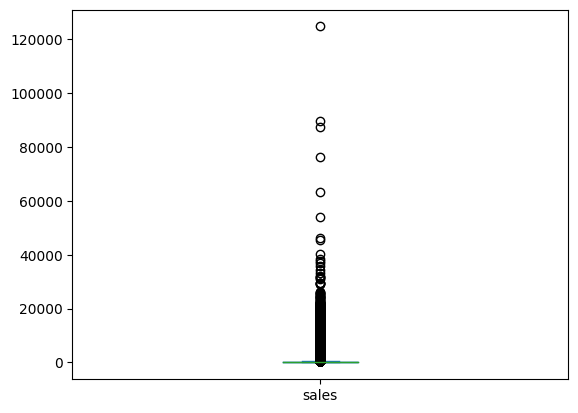

In [ ]:
#Sales contains some significant skewing and there are some extreme values present.
df_train.sales.plot(kind='box')

### df_holidays

In [ ]:
#checking for null values
df_holidays.isnull().any()

date           False
type           False
locale         False
locale_name    False
description    False
transferred    False
dtype: bool

In [ ]:
#describe does not indicate the presense of any major data quality issues.
df_holidays.describe()

,date,type,locale,locale_name,description,transferred
count,350,350,350,350,350,350
unique,312,6,3,24,103,2
top,2014-06-25,Holiday,National,Ecuador,Carnaval,False
freq,4,221,174,174,10,338


### df_oil

In [ ]:
#checking for null values
df_oil.isnull().any()

date          False
dcoilwtico     True
dtype: bool

In [ ]:
#Only about 4% of the dcoilwtico field has missing values. This is not very significant and shouldn't create a material data quality issue.
df_oil.isnull().sum() / df_oil.count()

date         0.00
dcoilwtico   0.04
dtype: float64

In [ ]:
df_oil.loc[df_oil['dcoilwtico'].isnull() == True].head()

,date,dcoilwtico
0,2013-01-01,NaN
14,2013-01-21,NaN
34,2013-02-18,NaN
63,2013-03-29,NaN
104,2013-05-27,NaN


In [ ]:
#describe does not indicate the presense of any major data quality issues.
df_oil.describe()

,dcoilwtico
count,1175.00
mean,67.71
std,25.63
min,26.19
25%,46.41
50%,53.19
75%,95.66
max,110.62


### df_store

In [ ]:
df_store.isnull().any()

store_nbr    False
city         False
state        False
type         False
cluster      False
dtype: bool

In [ ]:
#describe does not indicate the presense of any major data quality issues.
df_store.describe()

,store_nbr,cluster
count,54.00,54.00
mean,27.50,8.48
std,15.73,4.69
min,1.00,1.00
25%,14.25,4.00
50%,27.50,8.50
75%,40.75,13.00
max,54.00,17.00


### df_transaction

In [ ]:
df_transaction.isnull().any()

date            False
store_nbr       False
transactions    False
dtype: bool

In [ ]:
#describe does not indicate the presense of any major data quality issues.
df_transaction.describe()

,store_nbr,transactions
count,83488.00,83488.00
mean,26.94,1694.60
std,15.61,963.29
min,1.00,5.00
25%,13.00,1046.00
50%,27.00,1393.00
75%,40.00,2079.00
max,54.00,8359.00


## EDA: Basic Data Transformations

In [ ]:
df_transaction.sort_values(["store_nbr", "date"])

# Datetime
df_train["date"] = pd.to_datetime(df_train.date)
df_train['is_test'] = 0

df_test["date"] = pd.to_datetime(df_test.date)
df_test['is_test'] = 1

df_transaction["date"] = pd.to_datetime(df_transaction.date)
df_oil["date"] = pd.to_datetime(df_oil.date)

df_merged = pd.concat([df_train, df_test], axis=0)

# Data types
df_train.onpromotion = df_train.onpromotion.astype("float16")
df_train.sales = df_train.sales.astype("float32")
df_store.cluster = df_store.cluster.astype("int8")

df_merged.head()

,id,date,store_nbr,family,sales,onpromotion,is_test
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0,0
1,1,2013-01-01,1,BABY CARE,0.00,0,0
2,2,2013-01-01,1,BEAUTY,0.00,0,0
3,3,2013-01-01,1,BEVERAGES,0.00,0,0
4,4,2013-01-01,1,BOOKS,0.00,0,0


In [ ]:
# define feature type variables

dep_var = ['sales']

categorical_vars = ['store_nbr', 'family', 'onpromotion']

discrete_vars = []

continuous_vars = []

## EDA: Daily and Monthly Sales Patterns (Steeve)

<Axes: title={'center': 'Total Sales Volume per Day of Week'}, xlabel='dayofweek', ylabel='sales'>

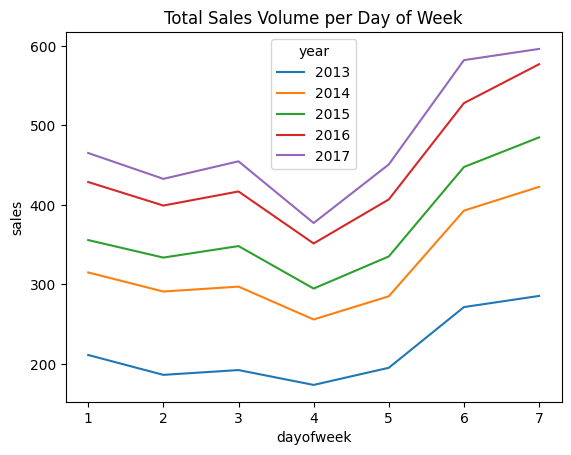

In [ ]:
df_sales_explore_sl = df_train.copy()

# add day of week to dataset
df_sales_explore_sl["dayofweek"] = df_sales_explore_sl.date.dt.dayofweek+1
df_sales_explore_sl["year"] = df_sales_explore_sl.date.dt.year

df_sales_explore_sl = df_sales_explore_sl.groupby(["year", "dayofweek"]).sales.mean().reset_index()

df_sales_explore_sl.pivot_table(values="sales",index="dayofweek",columns="year").plot(ylabel="sales", title="Total Sales Volume per Day of Week")

The plot suggests that the company has sustained some growth year over year. The interesting pattern from a grocery store standpoint is that there is a dip in sales on Thursdays, and much high sales over the weekend. Day of week will be a good feature for machine learning.

Next step is to look at overall sales patterns per month.

<Axes: title={'center': 'Monthly Total Sales'}, xlabel='year-month'>

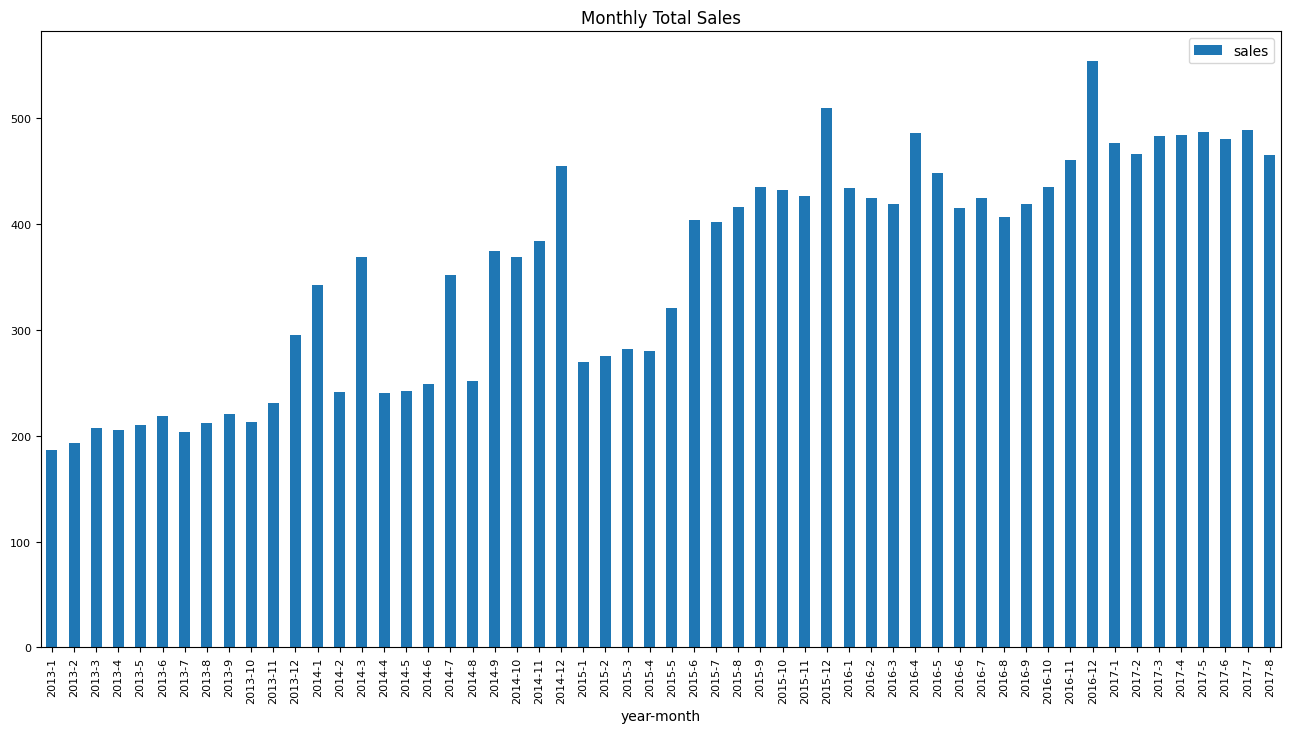

In [ ]:
df_sales_explore_sl = df_train.copy()

# add day of week to dataset
df_sales_explore_sl["month"] = df_sales_explore_sl.date.dt.month
df_sales_explore_sl["year"] = df_sales_explore_sl.date.dt.year

df_sales_explore_sl = df_sales_explore_sl.groupby(["year", "month"]).sales.mean().reset_index()
df_sales_explore_sl["year-month"] = df_sales_explore_sl["year"].astype(str) + "-" + df_sales_explore_sl["month"].astype(str)

df_sales_explore_sl.plot(kind='bar', x='year-month', y='sales', title="Monthly Total Sales",
                         figsize = (16,8), fontsize=8)

The graph above clearly shows a pattern of stronger sales in the summer and then in the fall, culminating in a peek of sales in December, presumably due to Christmas holidays. The "Month" attribute should prove useful as a predictor.

## EDA: Zero Sales Analysis (Steeve)

The objective here is to identify stores that have not sold a given product line since the start of 2016. For these, we would forecast a plain zero for sales.

In [ ]:
df_sales_explore_sl = df_train.copy()

# add day of week to dataset
df_sales_explore_sl["dayofweek"] = df_sales_explore_sl.date.dt.dayofweek+1
df_sales_explore_sl["year"] = df_sales_explore_sl.date.dt.year

# extract sales since 2016
df_last2years_sales = df_sales_explore_sl[df_sales_explore_sl["year"].isin([2016,2017])]

# Calculate sum of sales by store number and product family
df_sales_by_product = df_last2years_sales.groupby(["store_nbr", "family"]).sales.sum().reset_index()

# Extract zero sales
df_zero_sales = df_sales_by_product.loc[(df_sales_by_product["sales"] == 0)]

df_zero_sales

,store_nbr,family,sales
1,1,BABY CARE,0.00
268,9,BOOKS,0.00
301,10,BOOKS,0.00
317,10,LAWN AND GARDEN,0.00
334,11,BOOKS,0.00
...,...,...,...
1684,52,BABY CARE,0.00
1687,52,BOOKS,0.00
1753,54,BOOKS,0.00
1768,54,LADIESWEAR,0.00


In [ ]:
df_zero_sales = df_zero_sales.drop("sales", axis=1)
df_sales_explore_sl = pd.merge(df_sales_explore_sl, df_zero_sales, on=['store_nbr', 'family'], how='left', indicator='not_sold')
df_sales_explore_sl.head()

,id,date,store_nbr,family,sales,onpromotion,is_test,dayofweek,year,not_sold
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0.00,0,2,2013,left_only
1,1,2013-01-01,1,BABY CARE,0.00,0.00,0,2,2013,both
2,2,2013-01-01,1,BEAUTY,0.00,0.00,0,2,2013,left_only
3,3,2013-01-01,1,BEVERAGES,0.00,0.00,0,2,2013,left_only
4,4,2013-01-01,1,BOOKS,0.00,0.00,0,2,2013,left_only


In [ ]:
df_sales_explore_sl.value_counts(["not_sold"])

not_sold  
left_only     2893112
both           107776
right_only          0
dtype: int64

In [ ]:
df_sales_explore_sl['not_sold'] = df_sales_explore_sl['not_sold'].map({'left_only': 0, 'both':  1})
df_sales_explore_sl.value_counts(["not_sold"])

not_sold
0.00        2893112
1.00         107776
dtype: int64

OK, so roughly about 4% of all records have zero sales for a product family. This makes the "not_sold" attribute a valuable feature to consider.

Next step is to take a stab at determining other zero sales patterns with a more narrow focus on days where there are no sales across stores, indicating holiday closures for stores

In [ ]:
# drop store/family entries for which the product family is not sold by the store
df_sales_explore_sl = df_sales_explore_sl.loc[df_sales_explore_sl['not_sold'] == 0]
df_sales_explore_sl.value_counts(["not_sold"])

not_sold
0.00        2893112
dtype: int64

In [ ]:
# now that we have filtered out entries for which a store does not sell, let's find out
# from the data which days have zero sales for stores

df_sales_storeclosed = df_sales_explore_sl.groupby(['date', 'store_nbr']).sales.sum().reset_index()
df_sales_storeclosed = df_sales_storeclosed.loc[df_sales_storeclosed["sales"] == 0]
df_sales_storeclosed.date.value_counts()

2013-01-01    53
2016-01-01    53
2017-01-01    53
2015-01-01    53
2014-01-01    52
              ..
2016-04-07     1
2016-04-06     1
2016-04-05     1
2016-04-04     1
2017-04-19     1
Name: date, Length: 1566, dtype: int64

In [ ]:
# from the result above, it looks like there may be several single-store closures,
# possibly even for extended periods of times. Let's re-filter to only take into
# account multiple simultaneous store closures
df_sales_storeclosed.date.value_counts().loc[lambda x: x > 10]


2013-01-01    53
2016-01-01    53
2017-01-01    53
2015-01-01    53
2014-01-01    52
Name: date, dtype: int64

As per above results, January 1st seems to be the one day when grocery stores are predictably closed. They otherwise appear to be opened all year round. Could be useful to improve the accuracy of forecasts for a date range that includes January 1st.

## EDA: Effect of Inflation on Sales (Steeve)

Did inflation influence grocery sales between 2013 and 2017 in Ecuador? To find out, we download inflation data from the World Bank's open data registry and assess whether there is a correlation with overall sale volumes for that period.

In [ ]:
import pandas as pd

df_inflation = pd.read_excel("https://api.worldbank.org/v2/en/indicator/FP.CPI.TOTL.ZG?downloadformat=excel",sheet_name='Data', skiprows=3)

In [ ]:
df_inflation = df_inflation.loc[df_inflation["Country Name"] == 'Ecuador']
df_inflation.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
66,Ecuador,ECU,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,1.68,3.99,2.87,5.94,4.03,3.07,5.45,3.82,4.32,6.33,5.17,9.52,7.53,12.13,22.70,14.29,10.17,12.94,13.10,10.12,11.91,14.05,16.28,48.42,31.22,27.99,23.03,29.50,58.22,75.65,48.52,48.72,54.61,44.96,27.31,22.93,24.41,30.66,36.10,52.24,96.10,37.68,12.48,7.93,2.74,2.17,3.30,2.28,8.40,5.16,3.55,4.47,5.10,2.72,3.59,3.97,1.73,0.42,-0.22,0.27,-0.34,0.13,3.47


<Axes: title={'center': 'Inflation Rate in Ecuador from 2013 to 2017'}, xlabel='year'>

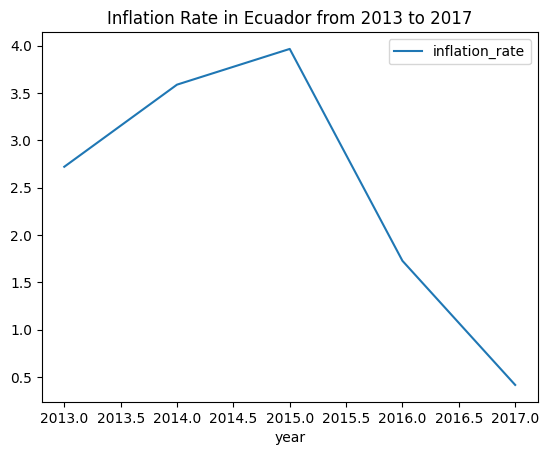

In [ ]:
df_inflation_pivot = pd.DataFrame([
    {"year": 2013, "inflation_rate":df_inflation.loc[66]["2013"]},
    {"year": 2014, "inflation_rate":df_inflation.loc[66]["2014"]},
    {"year": 2015, "inflation_rate":df_inflation.loc[66]["2015"]},
    {"year": 2016, "inflation_rate":df_inflation.loc[66]["2016"]},
    {"year": 2017, "inflation_rate":df_inflation.loc[66]["2017"]},
])
df_inflation_pivot.plot(x="year", y="inflation_rate", title="Inflation Rate in Ecuador from 2013 to 2017")

As the graph shows, inflation peaked at 4% in 2015 to get down to a historic low in 2017.

In [ ]:
df_sales_explore_sl = df_train.copy()
df_sales_explore_sl["year"] = df_sales_explore_sl.date.dt.year
df_sales_by_year = df_sales_explore_sl.groupby("year").sales.sum().reset_index()
df_sales_by_year.head()

,year,sales
0,2013,140419008.00
1,2014,209474240.00
2,2015,240880096.00
3,2016,288654528.00
4,2017,194217072.00


In [ ]:
print(np.corrcoef(df_sales_by_year["sales"], df_inflation_pivot["inflation_rate"]))


[[1.         0.00572948]
 [0.00572948 1.        ]]


Our conclusion from the results above is that inflation had no incidence on yearly sales volume in these years.

## EDA: Oil (Ryan)

We're gonna explore the oil dataset.

Find any missing values, get a feel for the data

In [ ]:
num_rows_with_na = df_oil.isna().any(axis=1).sum()

df_oil_explore = df_oil.copy().dropna()
df_oil_explore['dayofweek'] = df_oil_explore.date.dt.dayofweek+1
df_oil_explore['year'] = df_oil_explore.date.dt.year

print(f"Number of rows with NA: {num_rows_with_na}")
df_oil_explore.head()

Number of rows with NA: 43


,date,dcoilwtico,dayofweek,year
1,2013-01-02,93.14,3,2013
2,2013-01-03,92.97,4,2013
3,2013-01-04,93.12,5,2013
4,2013-01-07,93.20,1,2013
5,2013-01-08,93.21,2,2013


Looks like we have a continuous column for the oil stock price, and some missing values, so we should make sure to scale this in the pipeline and remove any msising values.

### Plot
Lets plot the price over time to see what we're dealing with

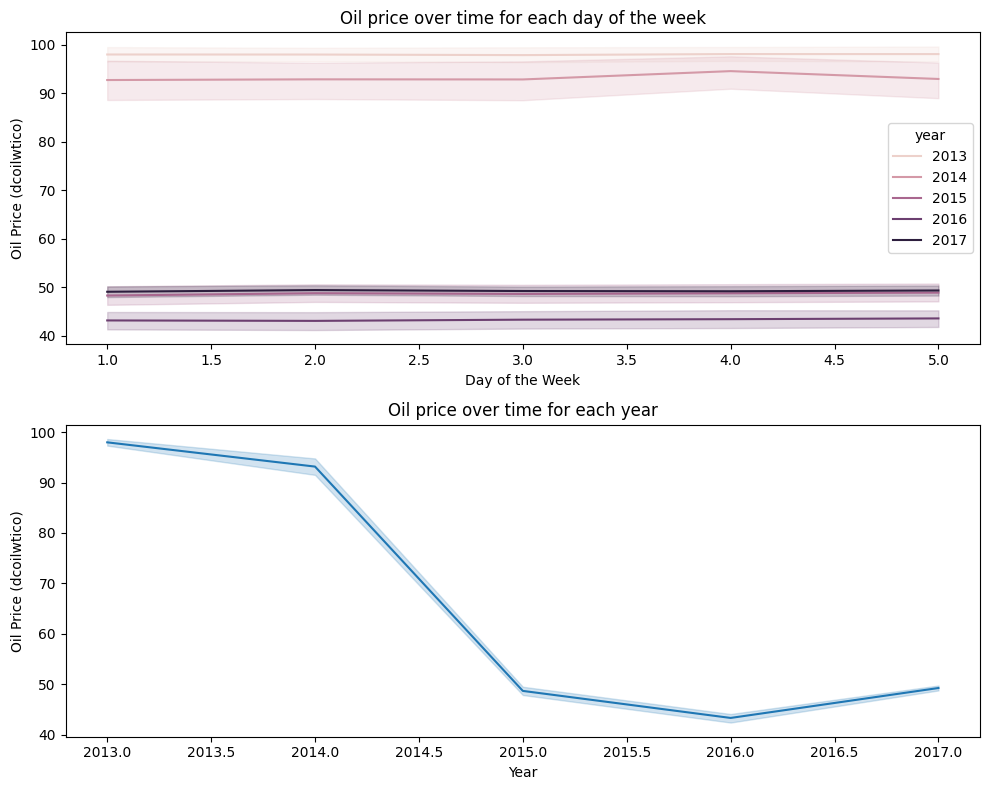

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# line plot
sns.lineplot(data=df_oil_explore, x="dayofweek", y="dcoilwtico", hue="year", ax=axes[0])
axes[0].set_title("Oil price over time for each day of the week")
axes[0].set_xlabel("Day of the Week")
axes[0].set_ylabel("Oil Price (dcoilwtico)")

# better view line plot
sns.lineplot(data=df_oil_explore, x="year", y="dcoilwtico", ax=axes[1])
axes[1].set_title("Oil price over time for each year")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Oil Price (dcoilwtico)")

plt.tight_layout()
plt.show()

Damn, ok. It looks like the oil price daily dropped by about half during 2015 and onward.

According to the data source, Ecuador is very dependent on oil, so the stock price has a huge impact on their economy.

We should definitely look at the prices before and after 2015 hits, because there will probably be an increase or decrease in sales / prices for most thing.

## EDA: Holidays (Ryan)

We're gonna explore the holidays dataset. We can start by making sure all our data types are correct, so lets convert them.

In [ ]:
df_holidays['date'] = pd.to_datetime(df_holidays['date'])
df_holidays['type'] = df_holidays['type'].astype("string")
df_holidays['locale'] = df_holidays['locale'].astype("string")
df_holidays['locale_name'] = df_holidays['locale_name'].astype("string")
df_holidays['description'] = df_holidays['description'].astype("string")
df_holidays['transferred'] = df_holidays['transferred'].astype('int')

df_merged_holy = pd.merge(df_merged, df_holidays, how='left', on='date')
df_merged_holy['dayofweek'] = df_merged_holy.date.dt.dayofweek + 1
df_merged_holy['is_weekend'] = df_merged_holy['dayofweek'].map(lambda x : x in (6, 7)).astype('int')

df_merged_holy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3082860 entries, 0 to 3082859
Data columns (total 14 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   is_test      int64         
 7   type         string        
 8   locale       string        
 9   locale_name  string        
 10  description  string        
 11  transferred  float64       
 12  dayofweek    int64         
 13  is_weekend   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(1), string(4)
memory usage: 352.8+ MB


Lets check missing values.

In [ ]:
df_merged_holy.isna().sum()

id                   0
date                 0
store_nbr            0
family               0
sales            28512
onpromotion          0
is_test              0
type           2578554
locale         2578554
locale_name    2578554
description    2578554
transferred    2578554
dayofweek            0
is_weekend           0
dtype: int64

Wow, that's a lot of missing values! Lets handle it.

In [ ]:
df_merged_holy.shape

(3082860, 14)

In [ ]:
df_non_nan = df_merged_holy.dropna(subset=['locale'])
df_non_nan.isna().sum()

id                0
date              0
store_nbr         0
family            0
sales          1782
onpromotion       0
is_test           0
type              0
locale            0
locale_name       0
description       0
transferred       0
dayofweek         0
is_weekend        0
dtype: int64

In [ ]:
df_non_nan.shape

(504306, 14)

This is much more reasonable.

Lets get some graphs to better visualize our data.

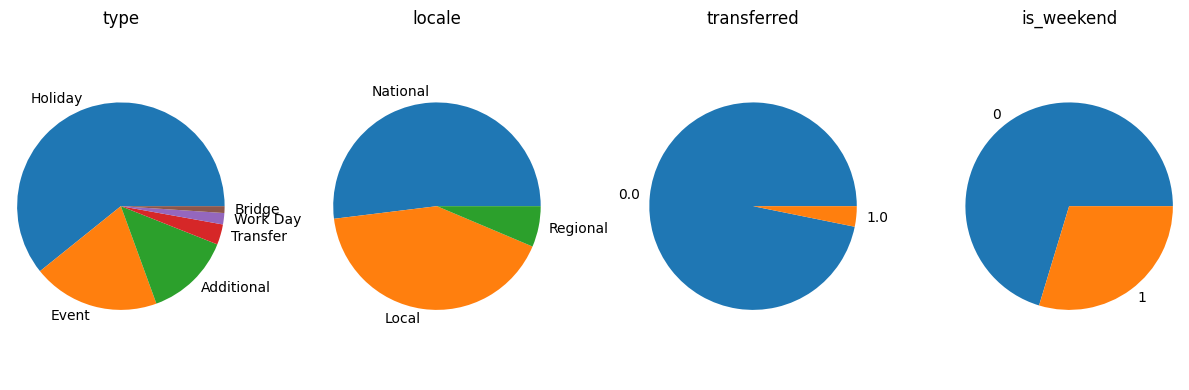

In [ ]:
df_merged_holy = df_non_nan

CATEGORICAL = ["type", 'locale', 'transferred', 'is_weekend']

fig, axes = plt.subplots(1, len(CATEGORICAL), figsize=(12, 4))

for i, col in enumerate(CATEGORICAL):

    count = df_merged_holy[col].value_counts()
    axes[i].pie(count.values, labels=count.index)
    axes[i].axis('equal')
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [ ]:
df_merged_holy.head(10)

,id,date,store_nbr,family,sales,onpromotion,is_test,type,locale,locale_name,description,transferred,dayofweek,is_weekend
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0,0,Holiday,National,Ecuador,Primer dia del ano,0.00,2,0
1,1,2013-01-01,1,BABY CARE,0.00,0,0,Holiday,National,Ecuador,Primer dia del ano,0.00,2,0
2,2,2013-01-01,1,BEAUTY,0.00,0,0,Holiday,National,Ecuador,Primer dia del ano,0.00,2,0
3,3,2013-01-01,1,BEVERAGES,0.00,0,0,Holiday,National,Ecuador,Primer dia del ano,0.00,2,0
4,4,2013-01-01,1,BOOKS,0.00,0,0,Holiday,National,Ecuador,Primer dia del ano,0.00,2,0
5,5,2013-01-01,1,BREAD/BAKERY,0.00,0,0,Holiday,National,Ecuador,Primer dia del ano,0.00,2,0
6,6,2013-01-01,1,CELEBRATION,0.00,0,0,Holiday,National,Ecuador,Primer dia del ano,0.00,2,0
7,7,2013-01-01,1,CLEANING,0.00,0,0,Holiday,National,Ecuador,Primer dia del ano,0.00,2,0
8,8,2013-01-01,1,DAIRY,0.00,0,0,Holiday,National,Ecuador,Primer dia del ano,0.00,2,0
9,9,2013-01-01,1,DELI,0.00,0,0,Holiday,National,Ecuador,Primer dia del ano,0.00,2,0


Lets see how these features correlate with sale:

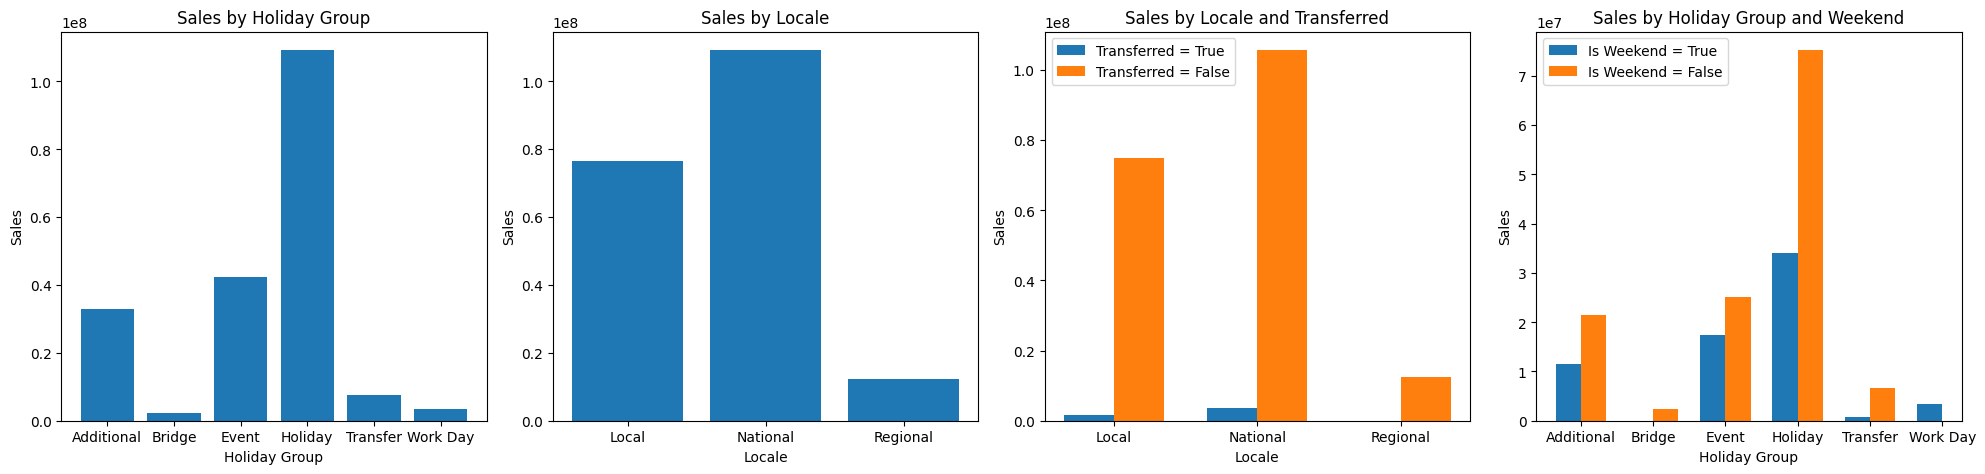

In [ ]:
grouped_type = df_merged_holy.groupby(['type'])['sales'].sum().reset_index()
grouped_type_weekend = df_merged_holy.groupby(['type', 'is_weekend'])['sales'].sum().unstack().reset_index()
grouped_locale = df_merged_holy.groupby(['locale'])['sales'].sum().reset_index()
grouped_locale_trans = df_merged_holy.groupby(['locale', 'transferred'])['sales'].sum().unstack().reset_index()


plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.title("Sales by Holiday Group")
plt.xlabel("Holiday Group")
plt.ylabel("Sales")
plt.bar(grouped_type['type'], grouped_type['sales'])


plt.subplot(1, 4, 2)
plt.title("Sales by Locale")
plt.xlabel("Locale")
plt.ylabel("Sales")
plt.bar(grouped_locale['locale'], grouped_locale['sales'])

plt.subplot(1, 4, 3)
plt.title("Sales by Locale and Transferred")
plt.xlabel("Locale")
plt.ylabel("Sales")
bar_width = 0.35
index = np.arange(len(grouped_locale_trans))
plt.bar(index, grouped_locale_trans[True], bar_width, label='Transferred = True')
plt.bar(index + bar_width, grouped_locale_trans[False], bar_width, label='Transferred = False')
plt.xticks(index + bar_width / 2, grouped_locale_trans['locale'])
plt.legend()


plt.subplot(1, 4, 4)
plt.title("Sales by Holiday Group and Weekend")
plt.xlabel("Holiday Group")
plt.ylabel("Sales")
bar_width = 0.35
index = np.arange(len(grouped_type_weekend))
plt.bar(index, grouped_type_weekend[True], bar_width, label='Is Weekend = True')
plt.bar(index + bar_width, grouped_type_weekend[False], bar_width, label='Is Weekend = False')
plt.xticks(index + bar_width / 2, grouped_type_weekend['type'])
plt.legend()


plt.tight_layout()
plt.show()

It's crazy how many more sales there are when the event is a `holiday`, and it's also even more surprising that there is more sales when the holiday is on a weekday instead of weekend. I'm not super surprised about the locale, `local` and `national` holidays seem like they would be much more popular than regional, and this is what the graph is showing.

## EDA: Pay Day (Keaton)

---

Objective: Observe if store sales increase within a certain time threshold on or after pay days, which occurs on the 15th and last days of each month. What is the time threshold if there is a trend?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# pay_day_transactions = pd.read_csv('transactions.csv')
pay_day_transactions = df_transaction.copy()
pay_day_transactions['day_of_week'] = pay_day_transactions.date.dt.day
pay_day_transactions['month'] = pay_day_transactions.date.dt.month

In [ ]:
pay_day_transactions_pivot = pd.pivot_table(pay_day_transactions, values = 'transactions', index = ['day_of_week'], aggfunc = np.sum).reset_index()

In [ ]:
pay_day_transactions_pivot

,day_of_week,transactions
0,1,4641199
1,2,4935067
2,3,4784612
3,4,4778409
4,5,4830056
5,6,4779955
6,7,4746095
7,8,4691106
8,9,4654772
9,10,4606177


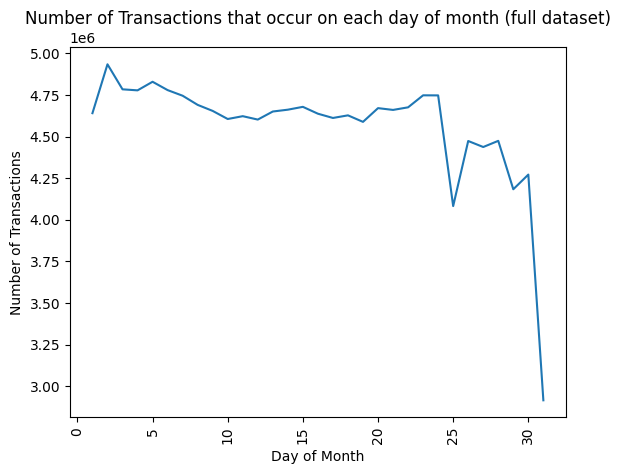

In [ ]:
plt.plot(pay_day_transactions_pivot.day_of_week, pay_day_transactions_pivot.transactions)
plt.xticks(rotation = 90)
plt.xlabel("Day of Month")
plt.ylabel("Number of Transactions")
plt.title("Number of Transactions that occur on each day of month (full dataset)")
plt.show()

Quick Observations:

- It does not appear that the mid-month (15th day) pay day results in any major spikes on or soon after the day.
- However, there does appear to be spikes on and after the last-day-of-month pay day. Even when considering an outlier on January 1st of each year causing the 1st day of month to be lower than expected, the first 7 days of the month averaged over 100,000 more transactions occuring on each individual day-of-month vs. the following 7 days.
- We also see that even though only half the months have pay days on the 31st, transactions that occur on that day is still well over half of transactions that occur on any other given day-of-month.

## EDA: Store Location (Sarah)

---



In [ ]:
df_holidays = pd.read_csv(url_holidays)
df_oil = pd.read_csv(url_oil)
# df_train = pd.read_csv(url_train)
df_store = pd.read_csv(url_store)
df_test = pd.read_csv(url_test)
df_transaction = pd.read_csv(url_transaction)

In [ ]:
df_train_store = df_train.copy()
df_train_store['datetime'] = pd.to_datetime(df_train_store['date'])

In [ ]:
df_train_store = df_train_store.merge(df_store, on="store_nbr", how="left")
df_train_store.head(10)

,id,date,store_nbr,family,sales,onpromotion,is_test,datetime,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0.00,0,2013-01-01,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.00,0.00,0,2013-01-01,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.00,0.00,0,2013-01-01,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.00,0.00,0,2013-01-01,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.00,0.00,0,2013-01-01,Quito,Pichincha,D,13
5,5,2013-01-01,1,BREAD/BAKERY,0.00,0.00,0,2013-01-01,Quito,Pichincha,D,13
6,6,2013-01-01,1,CELEBRATION,0.00,0.00,0,2013-01-01,Quito,Pichincha,D,13
7,7,2013-01-01,1,CLEANING,0.00,0.00,0,2013-01-01,Quito,Pichincha,D,13
8,8,2013-01-01,1,DAIRY,0.00,0.00,0,2013-01-01,Quito,Pichincha,D,13
9,9,2013-01-01,1,DELI,0.00,0.00,0,2013-01-01,Quito,Pichincha,D,13


In [ ]:
df_train_store['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [ ]:
df_train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000888 entries, 0 to 3000887
Data columns (total 12 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float32       
 5   onpromotion  float16       
 6   is_test      int64         
 7   datetime     datetime64[ns]
 8   city         object        
 9   state        object        
 10  type         object        
 11  cluster      int64         
dtypes: datetime64[ns](2), float16(1), float32(1), int64(4), object(4)
memory usage: 269.0+ MB


In [ ]:
df_train_store["dayofweek"] = df_train_store["datetime"].dt.dayofweek+1
df_train_store["year"] = df_train_store["datetime"].dt.year
df_train_store.head(10)

,id,date,store_nbr,family,sales,onpromotion,is_test,datetime,city,state,type,cluster,dayofweek,year
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0.00,0,2013-01-01,Quito,Pichincha,D,13,2,2013
1,1,2013-01-01,1,BABY CARE,0.00,0.00,0,2013-01-01,Quito,Pichincha,D,13,2,2013
2,2,2013-01-01,1,BEAUTY,0.00,0.00,0,2013-01-01,Quito,Pichincha,D,13,2,2013
3,3,2013-01-01,1,BEVERAGES,0.00,0.00,0,2013-01-01,Quito,Pichincha,D,13,2,2013
4,4,2013-01-01,1,BOOKS,0.00,0.00,0,2013-01-01,Quito,Pichincha,D,13,2,2013
5,5,2013-01-01,1,BREAD/BAKERY,0.00,0.00,0,2013-01-01,Quito,Pichincha,D,13,2,2013
6,6,2013-01-01,1,CELEBRATION,0.00,0.00,0,2013-01-01,Quito,Pichincha,D,13,2,2013
7,7,2013-01-01,1,CLEANING,0.00,0.00,0,2013-01-01,Quito,Pichincha,D,13,2,2013
8,8,2013-01-01,1,DAIRY,0.00,0.00,0,2013-01-01,Quito,Pichincha,D,13,2,2013
9,9,2013-01-01,1,DELI,0.00,0.00,0,2013-01-01,Quito,Pichincha,D,13,2,2013


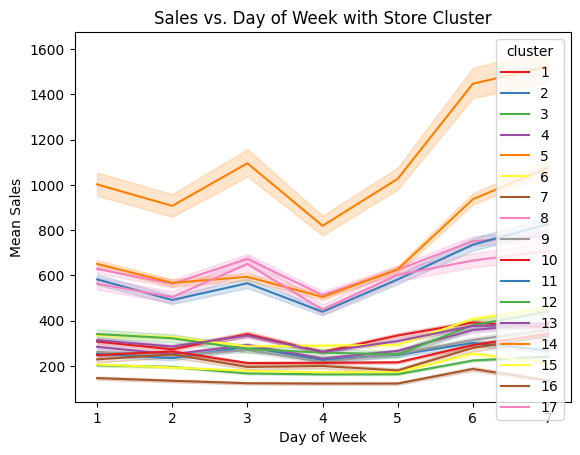

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x='dayofweek', y='sales', hue='cluster', data=df_train_store, palette='Set1')
plt.xlabel('Day of Week')
plt.ylabel('Mean Sales')
plt.title('Sales vs. Day of Week with Store Cluster')
plt.show()


There are 3 clusters of stores based on their sales range. The top performing store is store #14. All stores tend to have increased sale on Saturdays. Some stores have higher sale on Sunday.

In [ ]:
import random
list = ['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS', 'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS','FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES', 'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE','LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE','PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES','SEAFOOD']

sampled_list = random.sample(list, 6)
sampled_list

['GROCERY II',
 'PLAYERS AND ELECTRONICS',
 'PRODUCE',
 'LIQUOR,WINE,BEER',
 'SEAFOOD',
 'CLEANING']

In [ ]:
# compare group by cluster and group by store
df_train_store_nbr = df_train_store.copy()
df_train_store_nbr = df_train_store_nbr.groupby(['store_nbr', 'family']).mean()
df_train_store_nbr = df_train_store_nbr.reset_index()
df_train_store_nbr['family'] = df_train_store_nbr['family'].astype(str)
df_train_store_nbr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   store_nbr    1782 non-null   int64  
 1   family       1782 non-null   object 
 2   id           1782 non-null   float64
 3   sales        1782 non-null   float32
 4   onpromotion  1782 non-null   float32
 5   is_test      1782 non-null   float64
 6   cluster      1782 non-null   float64
 7   dayofweek    1782 non-null   float64
 8   year         1782 non-null   float64
dtypes: float32(2), float64(5), int64(1), object(1)
memory usage: 111.5+ KB


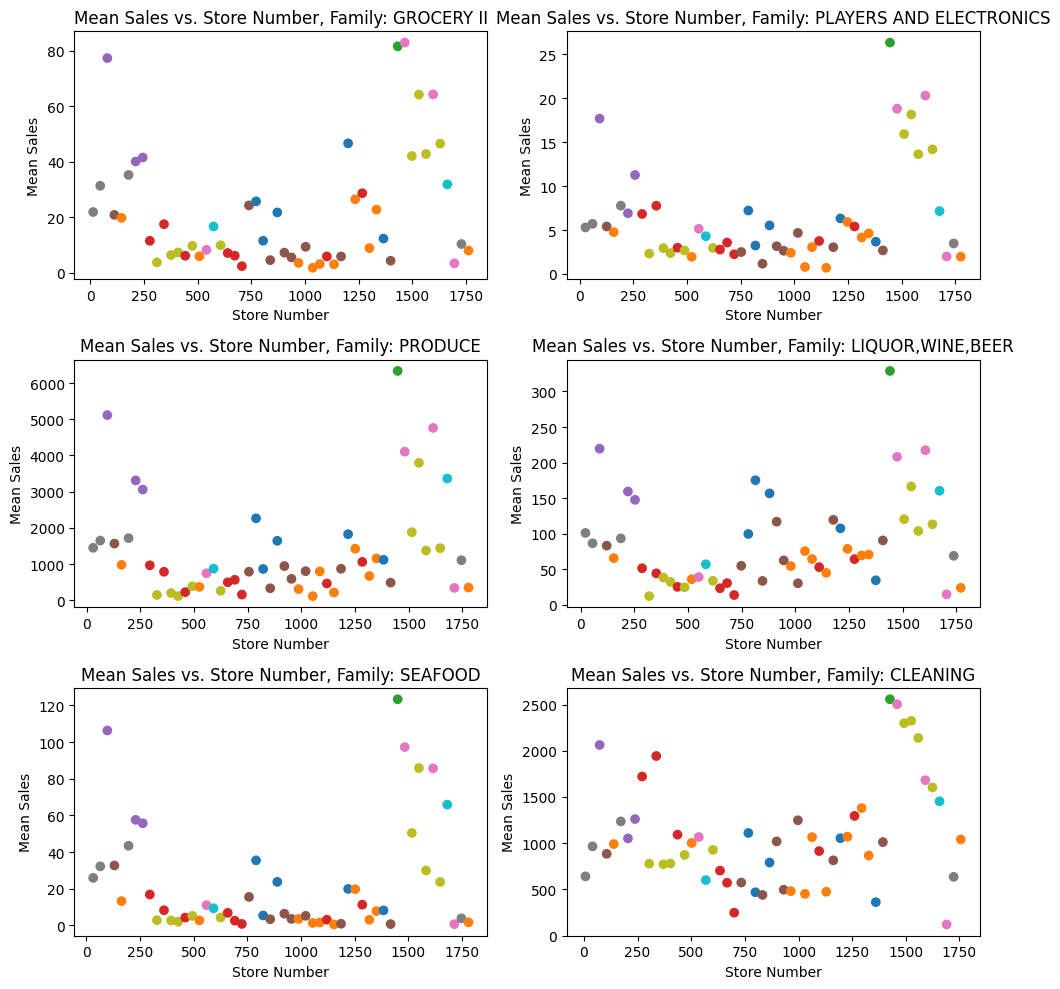

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
subplot_iterator = enumerate(axes.flatten(), 1)

for index, ax in subplot_iterator:
    sampled_family = sampled_list[index-1]
    df_train_store_index = df_train_store_nbr[df_train_store_nbr["family"] == sampled_family]
    ax.scatter(df_train_store_index.index, df_train_store_index['sales'], c=df_train_store_index['cluster'], cmap='tab10')
    ax.set_title(f'Mean Sales vs. Store Number, Family: {sampled_family}')
    ax.set_xlabel("Store Number")
    ax.set_ylabel("Mean Sales")
plt.tight_layout()
plt.show()

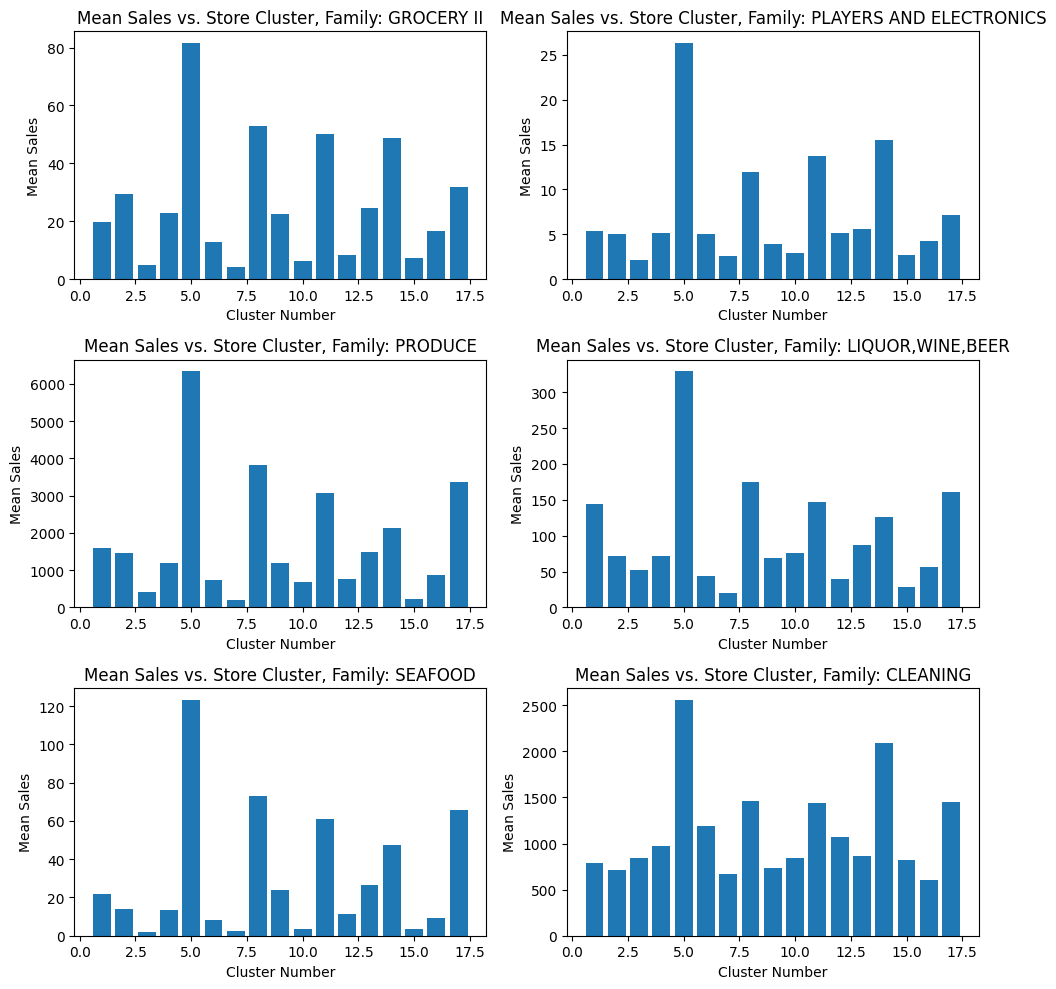

In [ ]:

fig, axes = plt.subplots(3, 2, figsize=(10, 10))
subplot_iterator = enumerate(axes.flatten(), 1)

for index, ax in subplot_iterator:
    sampled_family = sampled_list[index-1]
    df_index = df_train_store[df_train_store["family"] == sampled_family]
    df_index.drop(['id','datetime', 'city', 'state','type'], axis=1, inplace=True)
    df_index = df_index.groupby(['cluster']).mean()
    bars = ax.bar(df_index.index, df_index['sales'])
    ax.set_title(f'Mean Sales vs. Store Cluster, Family: {sampled_family}')
    ax.set_xlabel("Cluster Number")
    ax.set_ylabel("Mean Sales")
plt.tight_layout()
plt.show()


From the plot above, we can tell that there are 4 best performing store clusters that has the highest sales regardless of the family type. These are cluster 5, 8, 11 and 14.

The sales vs store number plots with cluster colouring showed that there are couple of stores that are higher than others, but the rest appears to be in the lower 1/3 of the graph. Mean Sales also correllates to the cluster, ie, stores in same cluster had similar sales, so we will use Cluster as a feature and not the store number.

In [ ]:
# to do - group based on city, try with size of dots as the sales and the plot city according to coordinates
df_city = df_train_store.copy()
df_city

,id,date,store_nbr,family,sales,onpromotion,is_test,datetime,city,state,type,cluster,dayofweek,year
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0.00,0,2013-01-01,Quito,Pichincha,D,13,2,2013
1,1,2013-01-01,1,BABY CARE,0.00,0.00,0,2013-01-01,Quito,Pichincha,D,13,2,2013
2,2,2013-01-01,1,BEAUTY,0.00,0.00,0,2013-01-01,Quito,Pichincha,D,13,2,2013
3,3,2013-01-01,1,BEVERAGES,0.00,0.00,0,2013-01-01,Quito,Pichincha,D,13,2,2013
4,4,2013-01-01,1,BOOKS,0.00,0.00,0,2013-01-01,Quito,Pichincha,D,13,2,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.13,0.00,0,2017-08-15,Quito,Pichincha,B,6,2,2017
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.55,1.00,0,2017-08-15,Quito,Pichincha,B,6,2,2017
3000885,3000885,2017-08-15,9,PRODUCE,2419.73,148.00,0,2017-08-15,Quito,Pichincha,B,6,2,2017
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.00,8.00,0,2017-08-15,Quito,Pichincha,B,6,2,2017


In [ ]:
df_city = df_city.groupby('city').mean()
df_city

,id,store_nbr,sales,onpromotion,is_test,cluster,dayofweek,year
city,,,,,,,,
Ambato,1500559.00,36.50,362.63,2.73,0.00,11.50,4.00,2014.84
Babahoyo,1500361.00,31.00,319.35,2.72,0.00,10.00,4.00,2014.84
Cayambe,1499635.00,11.00,509.71,3.13,0.00,6.00,4.00,2014.84
Cuenca,1500647.00,39.33,294.92,2.70,0.00,3.33,4.00,2014.84
Daule,1500196.00,27.00,345.28,2.76,0.00,1.00,4.00,2014.84
El Carmen,1501186.00,54.00,198.98,2.57,0.00,3.00,4.00,2014.84
Esmeraldas,1500790.00,43.00,294.96,2.24,0.00,10.00,4.00,2014.84
Guaranda,1499899.00,19.00,234.82,2.01,0.00,15.00,4.00,2014.84
Guayaquil,1500377.50,31.75,276.59,2.46,0.00,7.50,4.00,2014.84


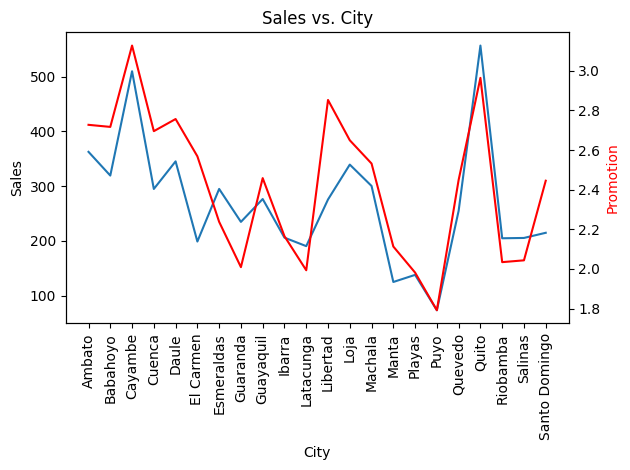

In [ ]:
fig, ax1 = plt.subplots()
sns.lineplot(x='city', y='sales', data=df_city, palette='Set1')
plt.xticks(rotation=90)
ax1.set_xlabel('City')
ax1.set_ylabel('Sales')
ax2 = ax1.twinx()
sns.lineplot(x='city', y='onpromotion', data=df_city, color='r', ax=ax2)
ax2.set_ylabel('Promotion', color='r')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.title('Sales vs. City')
plt.tight_layout()
plt.show()

From above, we can see that the sales in each city corresponds to when Promotion takes place. Since sales is correlated with onpromotion, we shoudl include onpromotion as a feature. We can then exclude City from the list of features.


## EDA: Product Family - Sarah



In [ ]:
import random
list = ['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS', 'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS','FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES', 'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE','LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE','PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES','SEAFOOD']

df_index= df_train_store.copy()
df_index.drop(['id','datetime', 'city', 'state','type'], axis=1, inplace=True)
df_index = df_index.groupby(['year', 'family']).mean()
df_index.head()

store_nbr   sales  onpromotion  is_test  cluster  dayofweek
year family                                                                 
2013 AUTOMOTIVE      27.50    4.70         0.00     0.00     8.48       4.00
     BABY CARE       27.50    0.00         0.00     0.00     8.48       4.00
     BEAUTY          27.50    2.41         0.00     0.00     8.48       4.00
     BEVERAGES       27.50 1107.95         0.00     0.00     8.48       4.00
     BOOKS           27.50    0.00         0.00     0.00     8.48       4.00

In [ ]:
df_index.reset_index(inplace=True)
top_3_families_per_year = df_index.groupby('year').apply(lambda x: x.nlargest(3, 'sales')).reset_index(drop=True)
#print(top_3_families_per_year)
top_3_families = top_3_families_per_year['family'][-3:]

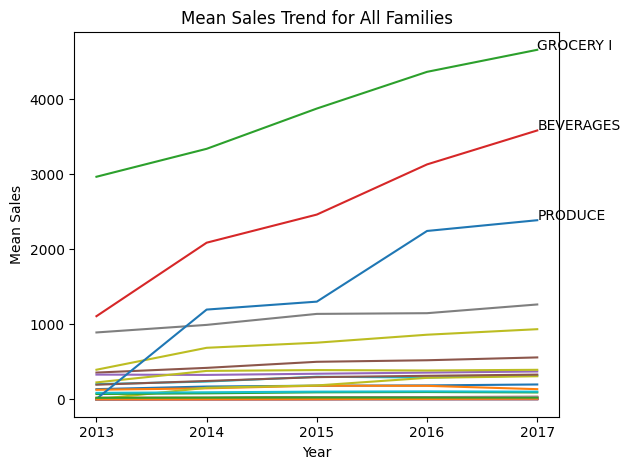

In [ ]:
for family, df_sorted in df_index.groupby('family'):
    plt.plot(df_sorted['year'], df_sorted['sales'])
    if family in top_3_families.tolist():
        plt.annotate(family, xy=(df_sorted['year'].max(), df_sorted['sales'].max()))

plt.xlabel("Year")
plt.ylabel("Mean Sales")
plt.title("Mean Sales Trend for All Families")
plt.xticks(df_index['year'].unique().astype(int))
plt.tight_layout()
plt.show()



Only 3 family type shows increase in sales number year to year, all others do not have significant increase and stayed stable over the last 5 years

# Predictive Models

### Pre-Processing Pipeline

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

import pandas as pd

In [ ]:
#re-add cell here so that you can run all the cells from Pre-Processing Pipeline onwards
# url_holidays = '/content/Store Sales - Time Series Forecasting/holidays_events.csv'
# url_oil = '/content/Store Sales - Time Series Forecasting/oil.csv'
# url_test = '/content/Store Sales - Time Series Forecasting/test.csv'
# url_train = '/content/Store Sales - Time Series Forecasting/train.csv'
# url_store = '/content/Store Sales - Time Series Forecasting/stores.csv'
# url_transaction = '/content/Store Sales - Time Series Forecasting/transactions.csv'

# df_holidays = pd.read_csv(url_holidays)
# df_oil = pd.read_csv(url_oil)
# df_train = pd.read_csv(url_train)
# df_store = pd.read_csv(url_store)
# df_test = pd.read_csv(url_test)
# df_transaction = pd.read_csv(url_transaction)

In [ ]:
# reload dataframes from file for the purpose of pre-processing

df_sales_ml = df_train.copy()
df_store_ml = df_store.copy()

# merge the sales and store df so that we get the cluster feature.
df_sales_ml = df_sales_ml.merge(df_store_ml, on="store_nbr", how="left")

# Data type conversion
df_sales_ml["date"] = pd.to_datetime(df_sales_ml.date)
df_sales_ml.onpromotion = df_sales_ml.onpromotion.astype("float16")
df_sales_ml.sales = df_sales_ml.sales.astype("float32")
df_sales_ml.store_nbr = df_sales_ml.store_nbr.astype("int8")

# reduce dataset size by selecting 1 cluster out of 5
df_sales_ml = df_sales_ml.loc[df_sales_ml["cluster"] % 5 == 0]

# add day of week, month, year features
df_sales_ml["dayofweek"] = df_sales_ml.date.dt.dayofweek+1
df_sales_ml["month"] = df_sales_ml.date.dt.month.astype('int')
df_sales_ml["year"] = df_sales_ml.date.dt.year.astype('int')
df_sales_ml['is_weekend'] = df_sales_ml['dayofweek'].map(lambda x : x in (6, 7)).astype('int')
# Add in Season - 0: Winter - 1: Spring - 2: Summer - 3: Fall
df_sales_ml["season"] = df_sales_ml["month"].apply(lambda x: 0 if x in [12, 1, 2] else
                                                    1 if x in [3, 4, 5] else
                                                    2 if x in [6, 7, 8] else
                                                    3 if x in [9, 10, 11] else 4).astype("int8")
df_sales_ml

,id,date,store_nbr,family,sales,onpromotion,is_test,city,state,type,cluster,dayofweek,month,year,is_weekend,season
33,33,2013-01-01,10,AUTOMOTIVE,0.00,0.00,0,Quito,Pichincha,C,15,2,1,2013,0,0
34,34,2013-01-01,10,BABY CARE,0.00,0.00,0,Quito,Pichincha,C,15,2,1,2013,0,0
35,35,2013-01-01,10,BEAUTY,0.00,0.00,0,Quito,Pichincha,C,15,2,1,2013,0,0
36,36,2013-01-01,10,BEVERAGES,0.00,0.00,0,Quito,Pichincha,C,15,2,1,2013,0,0
37,37,2013-01-01,10,BOOKS,0.00,0.00,0,Quito,Pichincha,C,15,2,1,2013,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000388,3000388,2017-08-15,44,POULTRY,909.19,0.00,0,Quito,Pichincha,A,5,2,8,2017,0,2
3000389,3000389,2017-08-15,44,PREPARED FOODS,329.52,0.00,0,Quito,Pichincha,A,5,2,8,2017,0,2
3000390,3000390,2017-08-15,44,PRODUCE,7239.62,10.00,0,Quito,Pichincha,A,5,2,8,2017,0,2
3000391,3000391,2017-08-15,44,SCHOOL AND OFFICE SUPPLIES,345.00,12.00,0,Quito,Pichincha,A,5,2,8,2017,0,2


In [ ]:
df_sales_ml[df_sales_ml['season'].isna()]

,id,date,store_nbr,family,sales,onpromotion,is_test,city,state,type,cluster,dayofweek,month,year,is_weekend,season


In [ ]:
df_train.shape

(3000888, 7)

In [ ]:
df_sales_ml.shape

(666864, 16)

In [ ]:
df_sales_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 666864 entries, 33 to 3000392
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id           666864 non-null  int64         
 1   date         666864 non-null  datetime64[ns]
 2   store_nbr    666864 non-null  int8          
 3   family       666864 non-null  object        
 4   sales        666864 non-null  float32       
 5   onpromotion  666864 non-null  float16       
 6   is_test      666864 non-null  int64         
 7   city         666864 non-null  object        
 8   state        666864 non-null  object        
 9   type         666864 non-null  object        
 10  cluster      666864 non-null  int64         
 11  dayofweek    666864 non-null  int64         
 12  month        666864 non-null  int64         
 13  year         666864 non-null  int64         
 14  is_weekend   666864 non-null  int64         
 15  season       666864 non-null  in

In [ ]:
#Removing zero sales
df_sales_explore_sl = df_sales_ml.copy()

# Calculate sum of sales by store number and product family
df_sales_by_product = df_sales_explore_sl.groupby(["store_nbr", "family"]).sales.sum().reset_index()

# Extract zero sales
df_zero_sales = df_sales_by_product.loc[(df_sales_by_product["sales"] == 0)]
df_zero_sales = df_zero_sales.drop("sales", axis=1)

df_sales_ml = pd.merge(df_sales_ml, df_zero_sales, on=['store_nbr', 'family'], how='left', indicator='not_sold')
df_sales_ml['not_sold'] = df_sales_ml['not_sold'].map({'left_only': 0, 'both':  1})
## drop the zero sales stores from the training dataset
df_sales_ml = df_sales_ml.loc[df_sales_ml['not_sold'] == 0]
df_sales_ml.value_counts(["not_sold"])

not_sold
0.00        641604
dtype: int64

In [ ]:
df_sales_ml.head()

,id,date,store_nbr,family,sales,onpromotion,is_test,city,state,type,cluster,dayofweek,month,year,is_weekend,season,not_sold
0,33,2013-01-01,10,AUTOMOTIVE,0.00,0.00,0,Quito,Pichincha,C,15,2,1,2013,0,0,0.00
1,34,2013-01-01,10,BABY CARE,0.00,0.00,0,Quito,Pichincha,C,15,2,1,2013,0,0,0.00
2,35,2013-01-01,10,BEAUTY,0.00,0.00,0,Quito,Pichincha,C,15,2,1,2013,0,0,0.00
3,36,2013-01-01,10,BEVERAGES,0.00,0.00,0,Quito,Pichincha,C,15,2,1,2013,0,0,0.00
5,38,2013-01-01,10,BREAD/BAKERY,0.00,0.00,0,Quito,Pichincha,C,15,2,1,2013,0,0,0.00


In [ ]:
#Adding National Holiday Data
df_holidays_national = df_holidays.copy()
df_holidays_national["date"] = pd.to_datetime(df_holidays_national["date"])
df_holidays_national = df_holidays_national.set_index('date')
df_holidays_national = df_holidays_national.loc[df_holidays_national["locale"]=="National"]
df_holidays_national = df_holidays_national.loc[(df_holidays_national["type"]=="Holiday") | (df_holidays_national["type"]=="Transfer")]
df_holidays_national = df_holidays_national["type"]
# merge holiday dates with main training set
df_sales_ml = pd.merge(df_sales_ml, df_holidays_national, how="left", on="date", indicator="is_holiday")
# convert result of merge to simple boolean value
df_sales_ml["is_holiday"] =np.where(df_sales_ml.is_holiday.str.contains("both"), 1, 0)
df_sales_ml.drop("type_y", axis=1)

,id,date,store_nbr,family,sales,onpromotion,is_test,city,state,type_x,cluster,dayofweek,month,year,is_weekend,season,not_sold,is_holiday
0,33,2013-01-01,10,AUTOMOTIVE,0.00,0.00,0,Quito,Pichincha,C,15,2,1,2013,0,0,0.00,1
1,34,2013-01-01,10,BABY CARE,0.00,0.00,0,Quito,Pichincha,C,15,2,1,2013,0,0,0.00,1
2,35,2013-01-01,10,BEAUTY,0.00,0.00,0,Quito,Pichincha,C,15,2,1,2013,0,0,0.00,1
3,36,2013-01-01,10,BEVERAGES,0.00,0.00,0,Quito,Pichincha,C,15,2,1,2013,0,0,0.00,1
4,38,2013-01-01,10,BREAD/BAKERY,0.00,0.00,0,Quito,Pichincha,C,15,2,1,2013,0,0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641599,3000388,2017-08-15,44,POULTRY,909.19,0.00,0,Quito,Pichincha,A,5,2,8,2017,0,2,0.00,0
641600,3000389,2017-08-15,44,PREPARED FOODS,329.52,0.00,0,Quito,Pichincha,A,5,2,8,2017,0,2,0.00,0
641601,3000390,2017-08-15,44,PRODUCE,7239.62,10.00,0,Quito,Pichincha,A,5,2,8,2017,0,2,0.00,0
641602,3000391,2017-08-15,44,SCHOOL AND OFFICE SUPPLIES,345.00,12.00,0,Quito,Pichincha,A,5,2,8,2017,0,2,0.00,0


In [ ]:
# define feature types

dep_var = ['sales']

categorical_vars = ['dayofweek', 'month', 'year', 'family', 'cluster', 'is_weekend', 'is_holiday', 'season']

discrete_vars = []

continuous_vars = ['onpromotion']

In [ ]:
# Categorical transformations - we are not going to impute for this, so one hot encoding only
# cat_si_step = ('si', SimpleImputer(strategy='constant', fill_value='Other'))
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
cat_steps = [cat_ohe_step]
cat_pipe = Pipeline(cat_steps)
cat_transformers = [('cat', cat_pipe, categorical_vars)]

# Numerical - impute, scale
num_si_step = ('si', SimpleImputer(strategy='median'))
num_scl_step = ('scl', MinMaxScaler())
num_steps = [num_si_step, num_scl_step]
num_pipe = Pipeline(num_steps)
num_transformers = [('num', num_pipe, discrete_vars + continuous_vars)]

Now use the pre-processing pipeline to transform the data

In [ ]:
ct = ColumnTransformer(transformers=cat_transformers + num_transformers)
ct.fit(df_sales_ml[categorical_vars + discrete_vars + continuous_vars])
X = ct.transform(df_sales_ml[categorical_vars + discrete_vars + continuous_vars])
# We know from our exploration that the dependent variable 'sales' does not have any missing values.
# It is also generally not necessary to apply transformations to normalize or scale
# the dependent variable.
y = df_sales_ml[['sales']].values

## Model 1 - HistGradientBoostingRegressor (Ensemble Algorithm)

In [ ]:
#Split into Train Test in chronological order so that future dataset does not leak into the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)
X_train.size

35416527

In [ ]:
y_train= y_train.ravel()
y_train

array([   0.,    0.,    0., ...,   24., 2909.,    0.], dtype=float32)

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
import time

grid_params = {'learning_rate': [0.1, 0.5, 1],
              'max_depth': [25, 50, 75],
              'max_iter': [100, 300, 500],
              'random_state': [123]
              }

refit = True  # Refit an estimator using the best found parameters on the whole dataset
scoring = 'neg_mean_squared_error'  # Strategy to evaluate the performance of the cross-validated model on the test set
n_jobs = -1  # Number of jobs to run in parallel
n_splits = 5

start1 = time.time()
tscv = TimeSeriesSplit(n_splits=5)
model = HistGradientBoostingRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=grid_params, refit=refit,
                           scoring=scoring, cv=tscv, n_jobs=n_jobs).fit(X_train, y_train)

print("Elapsed time: %6.3f seconds" % (time.time()-start1))
print(f'Model: {model} best params are: {grid_search.best_params_}')
print(f'Model: {model} best score is: {grid_search.best_score_}')

Elapsed time: 855.548 seconds
Model: HistGradientBoostingRegressor() best params are: {'learning_rate': 0.1, 'max_depth': 25, 'max_iter': 100, 'random_state': 123}
Model: HistGradientBoostingRegressor() best score is: -250554.4305670256


In [ ]:
#for time series, we will have to use Time Series Split Cross-Validation
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import time

list_rmse = [] #to keep track of the MSE
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

start_time = time.time()
tss_est_100 = HistGradientBoostingRegressor(learning_rate=0.1, max_iter=100, max_depth=25, random_state=123)

# Iterate through the time series cross-validation splits
for train_index, test_index in tscv.split(X):
    X_train_tscv, X_test_tscv = X[train_index], X[test_index]
    y_train_tscv, y_test_tscv = y[train_index], y[test_index]
    tss_est_100.fit(X_train_tscv, y_train_tscv.ravel())
    y_pred_tscv = tss_est_100.predict(X_test_tscv)
    #print("MSE:", mean_squared_error(y_test, y_pred))
    list_rmse.append(mean_squared_error(y_test_tscv, y_pred_tscv))

print("Elapsed time: %6.3f seconds" % (time.time()-start_time))

Elapsed time: 44.076 seconds


### Model 1 Evaluation:

In [ ]:
import numpy as np
average = np.mean(list_rmse)
print("Root of Mean of MSE: ", np.sqrt(average))

Root of Mean of MSE:  498.6535940224067


R2 Score: 0.9036257158392188


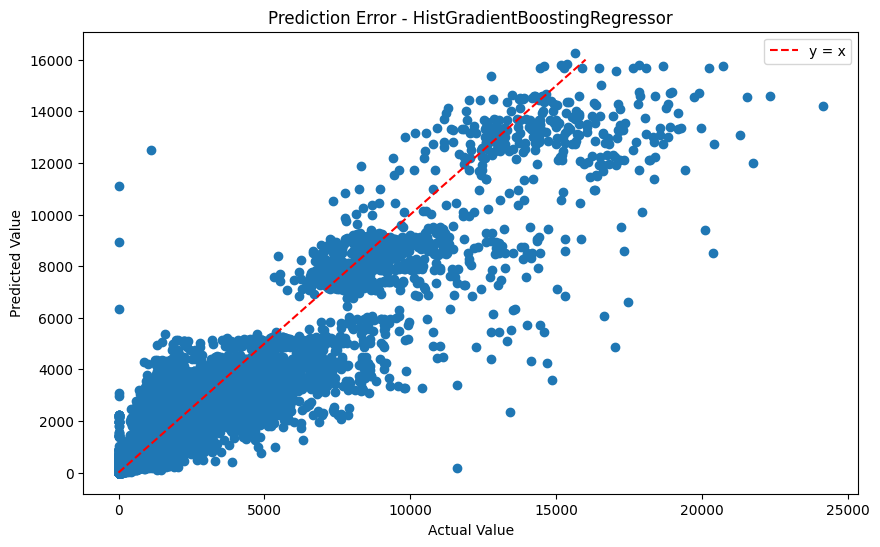

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#plot between y predicted and ytest values
y_pred_100 = tss_est_100.predict(X_test)
errors_100 = mean_squared_error(y_test, y_pred_100)
print("R2 Score:", r2_score(y_test, y_pred_100))

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_100)
#create the target line
x_values = np.linspace(0, 16000, 1000)
y_values = x_values
plt.plot(x_values, y_values, label='y = x', color='red', linestyle='dashed')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Prediction Error - HistGradientBoostingRegressor')
plt.legend()
plt.show()



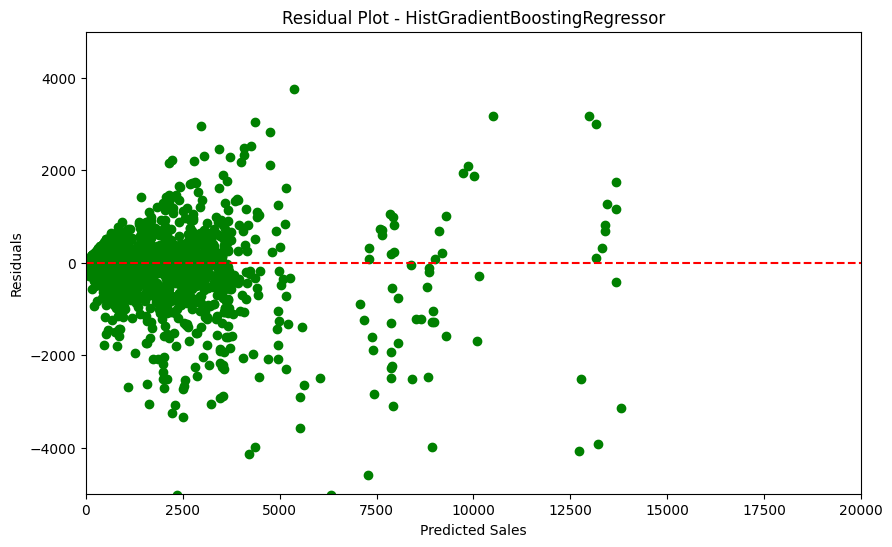

In [ ]:
#calculate residuals for sample of 10k thus requiring less RAM
sample_size = 10000
sample_indices = np.random.choice(len(y_test), size=sample_size, replace=False)
sampled_y_test = y_test[sample_indices]
sampled_y_pred = y_pred_100[sample_indices]
sampled_y_pred = np.squeeze(sampled_y_pred)
sampled_y_test = np.squeeze(sampled_y_test)
residual = sampled_y_pred - sampled_y_test

plt.figure(figsize=(10, 6))
plt.scatter(sampled_y_pred, residual, c='green')
plt.hlines(y=0, xmin=0, xmax=20000, color='red', linestyle='dashed')
plt.title("Residual Plot - HistGradientBoostingRegressor")
plt.ylabel('Residuals')
plt.xlabel('Predicted Sales')
plt.xlim([0,20000])
plt.ylim([-5000,5000])
plt.show()

The resulting model has R2 score of 0.904. The prediction error plot shows that the resulting predicted values follow the same shape as the y=x line. The outliers tend to be where the x value is less., where the actual values are close to 0, and the predicted values are significantly higher ~ when actual sales > 4000. This suggests that there are probably outlier in the raw data that affected the model trained. On the opposite side of the red line, at higher actual value, the model tends to predict sales value that is lower than the actual.
This is corroborated by the Residual plot, where we can see higher concentration of datapoints closer to the y-axis. These points are equally scattered on both sides of the x-axis which is what we would expect to see. At higher predicted values, there are more datapoints in the negative residuals so the model tends to underestimate the sales.
It could be driven by the data itself, that high sales would be outliers in the training dataset.
Previously in DEA, we see there are 3 clusters of stores based on the range of sales volume. For future, we can possibly separate out the 3 clusters of stores into their own training set and build different models.

In [ ]:
from sklearn.metrics import mean_squared_log_error

# This is a calculation of accuracy using the metrics used by the Kaggle competition.
# Leaderboard best score (lower is better): 0.37770

df_y_pred_100 = pd.DataFrame(y_pred_100, columns=["sales"])
df_y_pred_100["sales"] = np.where(df_y_pred_100.sales < 0, 0, df_y_pred_100.sales)
df_y_pred_100.describe()
# df_y_pred_100.loc[df_y_pred_100["sales"] < 0].describe()
print(np.sqrt(mean_squared_log_error( y_test, df_y_pred_100["sales"] )))

1.2839876165585329


## Model 2 - XGBoostRegressor

In [ ]:
import numpy as np
from pandas import read_csv
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import time

start_time = time.time()
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred_xgb = model.predict(X_test)
print("Elapsed time: %6.3f seconds" % (time.time()-start_time))


NameError: ignored

In [ ]:
errors = mean_squared_error(y_test, y_pred_xgb)
print("RMSE: ", np.sqrt(errors))
print("R2: ", r2_score(y_test, y_pred_xgb))

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb)
#create the target line
x_values = np.linspace(0, 16000, 1000)
y_values = x_values
plt.plot(x_values, y_values, label='y = x', color='red', linestyle='dashed')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Prediction Error - XGBoost')
plt.legend()
plt.show()

In [ ]:
#calculate residuals for sample of 10k since calculating it all at once will exhaust Colab's RAM limit
sample_size = 10000
sample_indices = np.random.choice(len(y_test), size=sample_size, replace=False)
sampled_y_test_xgb = y_test[sample_indices]
sampled_y_pred_xgb = y_pred_xgb[sample_indices]
sampled_y_pred_xgb = np.squeeze(sampled_y_pred_xgb)
sampled_y_test_xgb = np.squeeze(sampled_y_test_xgb)
residual_xgb = sampled_y_pred_xgb - sampled_y_test_xgb

plt.figure(figsize=(10, 6))
plt.scatter(sampled_y_pred_xgb, residual_xgb, c='green')
plt.hlines(y=0, xmin=0, xmax=20000, color='red', linestyle='dashed')
plt.title("Residual Plot - XGB")
plt.ylabel('Residuals')
plt.xlabel('Predicted Sales')
plt.xlim([0,20000])
plt.ylim([-2000,2000])
plt.show()

## Model 3 - SARIMAX

In this section SARIMAX is evaluated as a means to explore how time series algorithms work. SARIMAX was brought to our attention because it can integrate discriminating features such as the ones we have identified during the exploratory phase of the data to improve predictions in the time series.

During the evaluation, we quickly determined that SARIMAX would be too computationally demanding to realistically run the algorithm over the whole dataset. After all, the dataset contains more than 1783 distinct time series, one for each combination of store and product family. Processing for a single time series sequence was clocked at 10 minutes on a hex-core machine. As such, we focused our evaluation on a single product family in one major store in Quito.

### Custom Pre-Processing

In order to bring back the time series index into the training dataset, it is simpler to reload the dataset and select the single store/family combination that will be evaluated. In order to stay within limits from a processing standpoint, we will also re-execute the transformation with only a subset of the features.

In [ ]:
ts = df_train.copy()
ts["date"] = pd.to_datetime(ts["date"])
ts = ts.set_index('date')
ts.drop(['id'], axis=1, inplace=True)

# isolate a single time series for store #9 (major store in Quito) and for
# the liquor,wine and beer product family
ts = ts.loc[(ts["family"] == 'LIQUOR,WINE,BEER') & (ts["store_nbr"] == 9)]

# add month as exogenous variable
ts["month"]=ts.index.month

ts.head()

,store_nbr,family,sales,onpromotion,month
date,,,,,
2013-01-01,9,"LIQUOR,WINE,BEER",0.00,0,1
2013-01-02,9,"LIQUOR,WINE,BEER",22.00,0,1
2013-01-03,9,"LIQUOR,WINE,BEER",37.00,0,1
2013-01-04,9,"LIQUOR,WINE,BEER",54.00,0,1
2013-01-05,9,"LIQUOR,WINE,BEER",66.00,0,1


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# define feature types
dep_var = ['sales']
categorical_vars = ['month']
discrete_vars = []
continuous_vars = ['onpromotion']

# Categorical transformations - we are not going to impute for this, so one hot encoding only
# cat_si_step = ('si', SimpleImputer(strategy='constant', fill_value='Other'))
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
cat_steps = [cat_ohe_step]
cat_pipe = Pipeline(cat_steps)
cat_transformers = [('cat', cat_pipe, categorical_vars)]

# Numerical - impute, scale
num_si_step = ('si', SimpleImputer(strategy='median'))
num_scl_step = ('scl', MinMaxScaler())
num_steps = [num_si_step, num_scl_step]
num_pipe = Pipeline(num_steps)
num_transformers = [('num', num_pipe, discrete_vars + continuous_vars)]

ct = ColumnTransformer(transformers=cat_transformers + num_transformers)
ct.fit(ts[categorical_vars + discrete_vars + continuous_vars])
X = pd.DataFrame(ct.transform(ts[categorical_vars + discrete_vars + continuous_vars]),
                columns=ct.get_feature_names_out())

X.index = ts.index
X.head()

,cat__month_1,cat__month_2,cat__month_3,cat__month_4,cat__month_5,cat__month_6,cat__month_7,cat__month_8,cat__month_9,cat__month_10,cat__month_11,cat__month_12,num__onpromotion
date,,,,,,,,,,,,,
2013-01-01,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2013-01-02,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2013-01-03,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2013-01-04,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2013-01-05,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In the following cells we incorporate holiday data in the form of a simple boolean indicator that confirms whether a particular day is a national holiday. More work would be needed to incorporate local holidays and events.

In [ ]:
df_holidays_national = df_holidays.copy()
df_holidays_national["date"] = pd.to_datetime(df_holidays_national["date"])
df_holidays_national = df_holidays_national.set_index('date')
df_holidays_national = df_holidays_national.loc[df_holidays_national["locale"]=="National"]
df_holidays_national = df_holidays_national.loc[(df_holidays_national["type"]=="Holiday") | (df_holidays_national["type"]=="Transfer")]
df_holidays_national = df_holidays_national["type"]
df_holidays_national

date
2012-08-10     Holiday
2012-10-09     Holiday
2012-10-12    Transfer
2012-11-02     Holiday
2012-11-03     Holiday
                ...   
2017-08-11    Transfer
2017-10-09     Holiday
2017-11-02     Holiday
2017-11-03     Holiday
2017-12-25     Holiday
Name: type, Length: 68, dtype: object

In [ ]:
# merge holiday dates with main training set
X = pd.merge(X, df_holidays_national, how="left", on="date", indicator="is_holiday")
# convert result of merge to simple boolean value
X["is_holiday"] =np.where(X.is_holiday.str.contains("both"), 1, 0)
X = X.drop("type", axis=1)

X.head()

,cat__month_1,cat__month_2,cat__month_3,cat__month_4,cat__month_5,cat__month_6,cat__month_7,cat__month_8,cat__month_9,cat__month_10,cat__month_11,cat__month_12,num__onpromotion,is_holiday
date,,,,,,,,,,,,,,
2013-01-01,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
2013-01-02,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
2013-01-03,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
2013-01-04,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
2013-01-05,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


### Model Training and Prediction

SARIMAX is a complex algorithm. To statisfy the needs of the base algorithm, ARIMA, the time series must first be made 'stationary', i.e. the trend components have to be isolated with pre-processing steps such as differencing. The choice of parameters for the scale and reach of differencing are critical and different evaluation techniques are involved to select the best parameters.

The "S" and "X" in SARIMAX stand for 'Seasonal' and 'eXogenous'. Support for seasonal patterns is relevant for our project given the patterns we identified on weekly and monthly sales patterns. Support for exogenous variables is what makes the whole algorithm join the ranks of machine learning by enabling external variables to be used to further describe variance in the time series. There are parameters to be defined for the 'seasonal' aspects as well.

We found the learning curve involved in finding the right parameters for SARIMAX extremely steep and time constraints would normally have been justification for us to discard this predictive model. However, the SARIMAX libraries include a meta-engine API, named auto-arima, which automates the search of optimal parameters. As auto-arima is extremely CPU processing hungry, we used it only once to extract the parameters and then used that with the actual SARIMAX algorithm in the notebook.

In [ ]:
# Manually split the dataset. Training is the entire time series minus 31 days.
# Test is the last 31 days.
X_train = X.iloc[:-31]
X_test = X.iloc[-31:]

y_train = ts.iloc[:-31,2]
y_test = ts.iloc[-31:,2]

# X_train

In [ ]:
# uncomment the code in this cell and the next two to run auto-arima and extract optimal parameters
# ! pip install pmdarima

In [ ]:
# from pmdarima import auto_arima
# import time

# start_time = time.time()

# model = auto_arima(y = y_train, X = X_train, m = 7)

# print("Elapsed time: %6.3f seconds" % (time.time()-start_time))

In [ ]:
# model.arparams

# Result from auto-arima: order=(1,0,2), seasonal_order=(1,0,1,7)

In [ ]:
import statsmodels.api as sm
import time

# Train a Sarimax model using the parameters obtained from auto-arima
model_sarimax = sm.tsa.statespace.SARIMAX(y_train, exog=X_train,
                                          order=(1,0,2), seasonal_order=(1,0,1,7),
                                          simple_differencing=True)
start_time = time.time()
res = model_sarimax.fit(disp=False)
print("Elapsed time: %6.3f seconds" % (time.time()-start_time))
print("\n")
print(res.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Elapsed time: 38.553 seconds


                                      SARIMAX Results                                      
Dep. Variable:                               sales   No. Observations:                 1653
Model:             SARIMAX(1, 0, 2)x(1, 0, [1], 7)   Log Likelihood               -8515.397
Date:                             Thu, 10 Aug 2023   AIC                          17070.793
Time:                                     23:01:46   BIC                          17179.000
Sample:                                          0   HQIC                         17110.908
                                            - 1653                                         
Covariance Type:                               opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
cat__month_1         5.6816     29.189      0.195      0.846   

Our interpretation of the results is as follows:
* the months of November and December, as well as promotions, are the most statistically significant terms amongst exogenous variables.
* holidays were not deemed statistically significant. Our working theory for this is that sales of alcoholic beverages would typically spike in the week(s) before major holidays especially in the case of Christmas and New Year, not on the particular day of the holiday. As such, this trend would be better captured by the 'month' feature (e.g. December) as opposed to a single holiday event date.
* it appears that there is significant variance in the error residuals (heteroskasticity and associated p-value), and that errors are NOT white noise (Ljung-Box metric and associated p-value).

Our next step is to move forward with an actual forecast for the next 31 days.

In [ ]:
# predict the following 31 days
y_pred_sm = pd.Series(res.forecast(steps=31, exog=X_test))
y_pred_sm.index = y_test.index

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


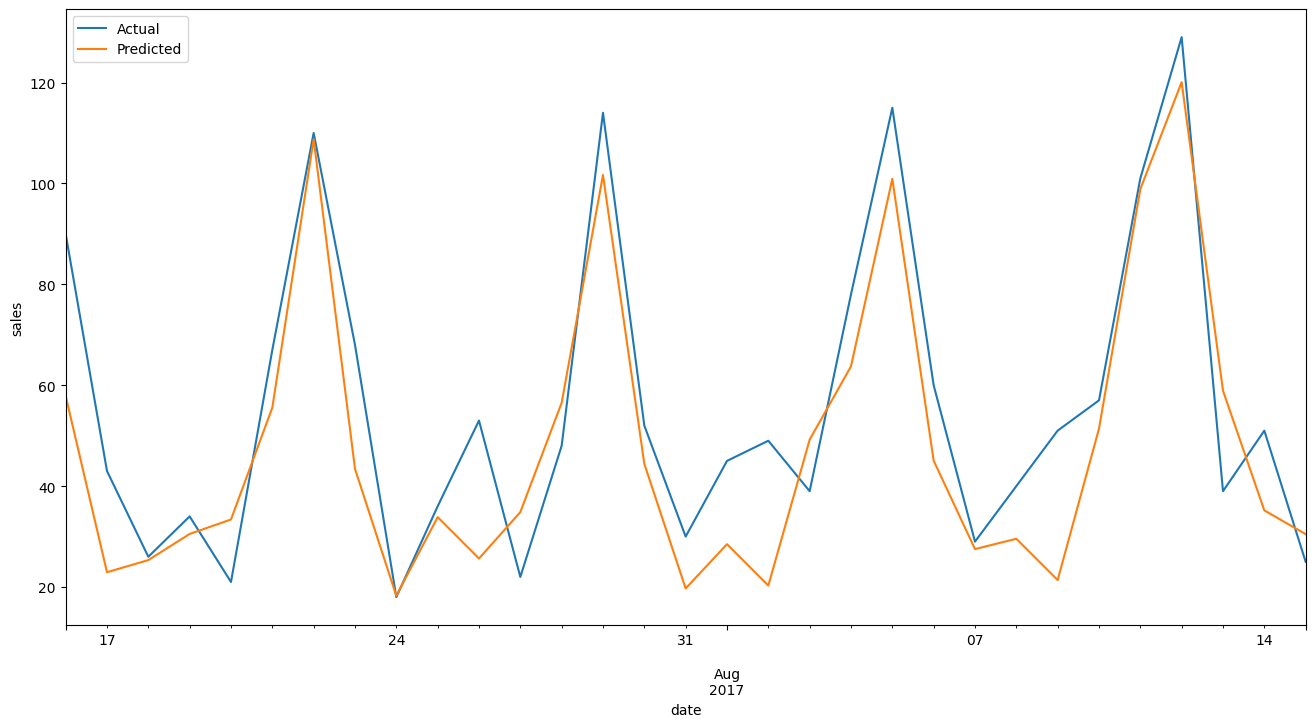

In [ ]:
import matplotlib.pyplot as plt

# plot the results
y_test.plot(figsize = (16,8), legend=True)
y_pred_sm.plot(ylabel='sales', legend=True)
plt.legend(['Actual', 'Predicted'])

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred_sm)

0.7440596411872249

# Exploring another XGBoostRegressor model to get a higher r2 (Hossein)

In [ ]:
df_test['test'] = 1
df_train['test'] = 0
df = pd.concat([df_train, df_test], axis=0)

In [ ]:
def datetime(df):
    df['date'] = pd.to_datetime(df["date"])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['day_of_week'] = df['date'].dt.day_of_week
    df['day_name'] = df['date'].dt.day_name()
    df['quarter'] = df['date'].dt.quarter
    df['is_leap_year'] = df['date'].dt.is_leap_year
    return df

In [ ]:
df = datetime(df)

In [ ]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,test,year,month,day,day_of_week,day_name,quarter,is_leap_year
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0,2013,1,1,1,Tuesday,1,False
1,1,2013-01-01,1,BABY CARE,0.0,0,0,2013,1,1,1,Tuesday,1,False
2,2,2013-01-01,1,BEAUTY,0.0,0,0,2013,1,1,1,Tuesday,1,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,0,2013,1,1,1,Tuesday,1,False
4,4,2013-01-01,1,BOOKS,0.0,0,0,2013,1,1,1,Tuesday,1,False


In [ ]:
df_holidays['date'] = pd.to_datetime(df_holidays['date'])
df_transaction['date'] = pd.to_datetime(df_transaction['date'])

In [ ]:
df = pd.merge(df, df_store, on='store_nbr', how='left')

In [ ]:
df = pd.merge(df, df_holidays, on='date', how='left')

In [ ]:
df.drop('description', inplace=True, axis=1)
df.drop('date', inplace=True, axis=1)

In [ ]:
cat_cols = ['family','city','state','type_x','type_y','locale','locale_name']

In [ ]:
from sklearn.preprocessing import LabelEncoder


df_encoded = pd.get_dummies(df, columns=cat_cols)

label_encode_cols = ['is_leap_year', 'transferred']
label_encoder = LabelEncoder()

for col in label_encode_cols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])


day_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

# cyclic encoding features for day_name
df_encoded['day_sin'] = df_encoded['day_name'].map(lambda x: np.sin(2 * np.pi * day_mapping[x] / 7))
df_encoded['day_cos'] = df_encoded['day_name'].map(lambda x: np.cos(2 * np.pi * day_mapping[x] / 7))

df_encoded.drop('day_name', axis=1, inplace=True)
df_encoded.head()

,id,store_nbr,sales,onpromotion,test,year,month,day,day_of_week,quarter,...,locale_name_Puyo,locale_name_Quevedo,locale_name_Quito,locale_name_Riobamba,locale_name_Salinas,locale_name_Santa Elena,locale_name_Santo Domingo,locale_name_Santo Domingo de los Tsachilas,day_sin,day_cos
0,0,1,0.0,0,0,2013,1,1,1,1,...,0,0,0,0,0,0,0,0,0.781831,0.62349
1,1,1,0.0,0,0,2013,1,1,1,1,...,0,0,0,0,0,0,0,0,0.781831,0.62349
2,2,1,0.0,0,0,2013,1,1,1,1,...,0,0,0,0,0,0,0,0,0.781831,0.62349
3,3,1,0.0,0,0,2013,1,1,1,1,...,0,0,0,0,0,0,0,0,0.781831,0.62349
4,4,1,0.0,0,0,2013,1,1,1,1,...,0,0,0,0,0,0,0,0,0.781831,0.62349


In [ ]:
target = 'sales'

X = df_encoded[df_encoded['test'] == 0]
X = X.drop(target, axis=1)

y = df_encoded[df_encoded['test'] == 0]
y = y[target]

test = df_encoded[df_encoded['test'] == 1]
test = test.drop(target, axis=1)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import time

best_params = {
    'max_depth': 5,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'reg:squarederror',
}

start_time3 = time.time()
model = xgb.XGBRegressor(**best_params)
model.fit(X_train, y_train)
print("Elapsed time: %6.3f seconds" % (time.time()-start_time3))
y_pred = model.predict(X_test)

Elapsed time: 1425.491 seconds


In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Squared Error: 145207.7843
Mean Absolute Error (MAE): 131.8277
R-squared (R2): 0.8786
